In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
cohort_22 = pd.read_csv('orientatino/2022-06-14-survey.csv')
cohort_21 = pd.read_csv('orientatino/2021-06-15-survey.csv')

In [13]:
cohort_22.head()

,Timestamp,Operating System,CPU Cycle Rate (in GHz),CPU Number of Cores (int),RAM (in GB),Hard Drive Size (in GB),GPU (short description as a string),GPU CUDA Number of Cores (int)
0,5/18/2022 12:30:44,MacOS,2.5,2,16,500,Intel Iris Plus Graphics 640 1536 MB,0
1,1/1/1970 0:00:00,Any Linux,500.0,-3,256,5,rtx 48000,6002283
2,6/8/2022 17:39:20,Windows,2.8,4,16,512,Intel Iris Xe Graphics,4
3,6/12/2022 21:25:43,Windows,2.3,8,16,936,Intel(R) UHD Graphics,2560
4,6/14/2022 11:51:11,MacOS,1.6,2,8,121,Intel UHD Graphics 617 1536 MB,2


In [14]:
cohort_21.head()

,Timestamp,Operating System,CPU Cycle Rate (in GHz),CPU Number of Cores,RAM (in GB),Hard Drive Size (in GB),GPU (short description)
0,6/12/2021 23:05:22,Windows 10,1.8,4,8,256,intel uhd 620
1,6/13/2021 20:36:02,Windows 10,2.8,4,16,460,Intel(R) Iris(R) Xe Graphics
2,6/13/2021 22:31:11,MacOS,3.1,2,8,512,Intel Iris Plus Graphics 650
3,6/14/2021 13:31:30,Windows 10,3.5,4,16,1000,NVIDIA GeForce GTX 1070 Ti
4,6/14/2021 14:13:55,MacOS,1.6,2,8,256,Intel HD Graphics 6000 1536 MB


In [15]:
cohort_22.iloc[1]

Timestamp                              1/1/1970 0:00:00
Operating System                              Any Linux
CPU Cycle Rate (in GHz)                           500.0
CPU Number of Cores (int)                            -3
RAM (in GB)                                         256
Hard Drive Size (in GB)                               5
GPU (short description as a string)           rtx 48000
GPU CUDA Number of Cores (int)                  6002283
Name: 1, dtype: object

In [45]:
# Get rid of row from 1970
cohort_22 = cohort_22.drop(labels=1, axis=0)

In [30]:
cohort_21['RAM (in GB)'].max()

202

In [31]:
cohort_21['RAM (in GB)'] == 202

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
Name: RAM (in GB), dtype: bool

In [32]:
# # Drop outlier RAM
# cohort_21 = cohort_21.drop(labels=18, axis=0)

In [33]:
# # Check 
# cohort_21['RAM (in GB)'].max()

32

In [62]:
cohort_21 = cohort_21.set_axis(['Timestamp', 'Operating System', 'CPU Cycle Rate (in GHz)', 'CPU Number of Cores (int)', 'RAM (in GB)', 'Hard Drive Size (in GB)', 'GPU (short description as a string)'], axis=1)

In [65]:
df = pd.concat([cohort_21, cohort_22])

In [86]:
df.head()

,Timestamp,Operating System,CPU Cycle Rate (in GHz),CPU Number of Cores (int),RAM (in GB),Hard Drive Size (in GB),GPU (short description as a string),GPU CUDA Number of Cores (int)
0,6/12/2021 23:05:22,Windows 10,1.8,4,8,256,intel uhd 620,NaN
1,6/13/2021 20:36:02,Windows 10,2.8,4,16,460,Intel(R) Iris(R) Xe Graphics,NaN
2,6/13/2021 22:31:11,MacOS,3.1,2,8,512,Intel Iris Plus Graphics 650,NaN
3,6/14/2021 13:31:30,Windows 10,3.5,4,16,1000,NVIDIA GeForce GTX 1070 Ti,NaN
4,6/14/2021 14:13:55,MacOS,1.6,2,8,256,Intel HD Graphics 6000 1536 MB,NaN


In [90]:
# Clean up columns

df[['Date', 'Time']] = df['Timestamp'].str.split(' ', 1, expand=True)

In [91]:
df

,Timestamp,Operating System,CPU Cycle Rate (in GHz),CPU Number of Cores (int),RAM (in GB),Hard Drive Size (in GB),GPU (short description as a string),GPU CUDA Number of Cores (int),Date,Time
0,6/12/2021 23:05:22,Windows 10,1.8,4,8,256,intel uhd 620,NaN,6/12/2021,23:05:22
1,6/13/2021 20:36:02,Windows 10,2.8,4,16,460,Intel(R) Iris(R) Xe Graphics,NaN,6/13/2021,20:36:02
2,6/13/2021 22:31:11,MacOS,3.1,2,8,512,Intel Iris Plus Graphics 650,NaN,6/13/2021,22:31:11
3,6/14/2021 13:31:30,Windows 10,3.5,4,16,1000,NVIDIA GeForce GTX 1070 Ti,NaN,6/14/2021,13:31:30
4,6/14/2021 14:13:55,MacOS,1.6,2,8,256,Intel HD Graphics 6000 1536 MB,NaN,6/14/2021,14:13:55
...,...,...,...,...,...,...,...,...,...,...
57,6/14/2022 14:16:47,Windows,1.8,4,16,450,NVIDIA GeForce GTX 1050,640.0,6/14/2022,14:16:47
58,6/14/2022 14:17:00,Windows,2.4,4,16,237,Intel(R) Iris(R) Xe Graphics,0.0,6/14/2022,14:17:00
59,6/14/2022 14:17:18,Any Linux,2.5,14,32,1000,NVIDIA GeForce RTX 3050 Ti Laptop GPU,2560.0,6/14/2022,14:17:18
60,6/14/2022 14:17:30,Windows,2.4,2,8,237,Intel (R) HD Graphics 520,192.0,6/14/2022,14:17:30


In [93]:
df[['Month', 'Day', 'Year']] = df['Date'].str.split('/', 2, expand=True)

In [98]:
df.drop(labels=['Timestamp', 'Date'], axis=1)

,Operating System,CPU Cycle Rate (in GHz),CPU Number of Cores (int),RAM (in GB),Hard Drive Size (in GB),GPU (short description as a string),GPU CUDA Number of Cores (int),Time,Month,Day,Year
0,Windows 10,1.8,4,8,256,intel uhd 620,NaN,23:05:22,6,12,2021
1,Windows 10,2.8,4,16,460,Intel(R) Iris(R) Xe Graphics,NaN,20:36:02,6,13,2021
2,MacOS,3.1,2,8,512,Intel Iris Plus Graphics 650,NaN,22:31:11,6,13,2021
3,Windows 10,3.5,4,16,1000,NVIDIA GeForce GTX 1070 Ti,NaN,13:31:30,6,14,2021
4,MacOS,1.6,2,8,256,Intel HD Graphics 6000 1536 MB,NaN,14:13:55,6,14,2021
...,...,...,...,...,...,...,...,...,...,...,...
57,Windows,1.8,4,16,450,NVIDIA GeForce GTX 1050,640.0,14:16:47,6,14,2022
58,Windows,2.4,4,16,237,Intel(R) Iris(R) Xe Graphics,0.0,14:17:00,6,14,2022
59,Any Linux,2.5,14,32,1000,NVIDIA GeForce RTX 3050 Ti Laptop GPU,2560.0,14:17:18,6,14,2022
60,Windows,2.4,2,8,237,Intel (R) HD Graphics 520,192.0,14:17:30,6,14,2022


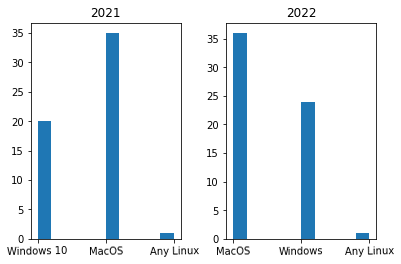

In [159]:
df.hist('Operating System', 'Year', rot=1)
plt.show()

In [120]:
table = pd.crosstab(df['Year'], df['Operating System'], normalize='index')

In [122]:
table

Operating System,Any Linux,MacOS,Windows,Windows 10
Year,,,,
2021,0.017857,0.625000,0.000000,0.357143
2022,0.016393,0.590164,0.393443,0.000000


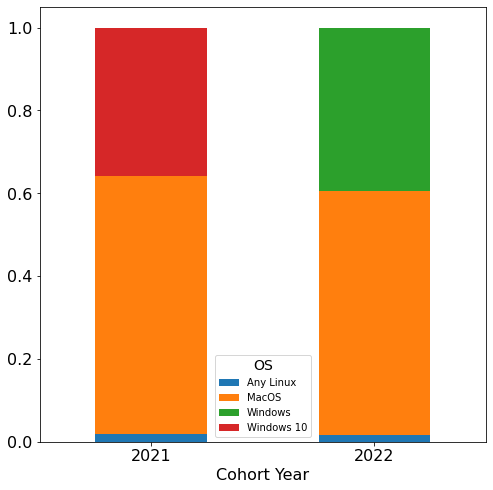

In [126]:
ax = table.plot.bar(rot=0, fontsize=16, stacked=True, figsize=[8,8])
plt.xlabel('Cohort Year', fontsize=16)
plt.legend(title='OS', title_fontsize=14)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


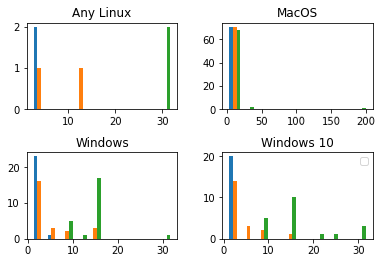

In [151]:
df.hist(column=['CPU Cycle Rate (in GHz)', 'CPU Number of Cores (int)', 'RAM (in GB)'], by='Operating System', rot=1)
plt.legend()
plt.xlabel('')
plt.show()

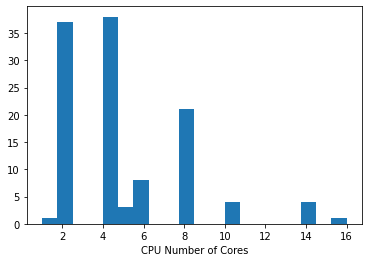

In [155]:
plt.hist(df['CPU Number of Cores (int)'], bins=20)
plt.xlabel('CPU Number of Cores')
plt.show()

<Figure size 14400x1440 with 0 Axes>

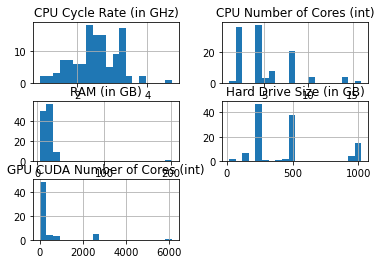

In [138]:
plt.figure(figsize=[200,20])
df.hist(bins=20)
plt.show()